In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
def plot_prec_rec(df, thresholded = 0):
        mask= (df['thresholded?'] == thresholded)
        bins = pd.cut(df["threshold"], np.arange(0, 0.05, 0.005))

        df_by_iter = df[mask].groupby(['iter', bins]).mean()[['precision','recall']]
        to_plot = df_by_iter.groupby(['threshold']).mean()
        to_plot[['prec_std', 'rec_std']] = df_by_iter.groupby(['threshold']).std()[['precision', 'recall']]
        to_plot['x'] = pd.IntervalIndex(to_plot.index.get_level_values('threshold')).mid
        to_plot = to_plot.reset_index().drop('threshold', axis=1)
        to_plot['prec_lower'] = to_plot.precision - 1.96*to_plot.prec_std
        to_plot['prec_upper'] = to_plot.precision + 1.96*to_plot.prec_std
        to_plot['rec_lower'] = to_plot.recall - 1.96*to_plot.rec_std
        to_plot['rec_upper'] = to_plot.recall + 1.96*to_plot.rec_std

        fig, ax = plt.subplots()
        ax.scatter(to_plot.x, to_plot.precision, color = 'blue', alpha = 0.5)
        #ax.fill_between(to_plot.x, to_plot.prec_upper, to_plot.prec_lower, color='blue', alpha=.2)
        ax.scatter(to_plot.x, to_plot.recall, color = 'red', alpha = 0.5)
        #ax.fill_between(to_plot.x, to_plot.rec_upper, to_plot.rec_lower, color='red', alpha=.2)
        x_rec_thr = to_plot.x[to_plot.recall<0.95].iloc[0]
        x_prec_thr = to_plot.x[to_plot.precision>0.3].iloc[0]

        ax.vlines(x = x_rec_thr,
                color = 'r',
                ymin = to_plot.rec_lower[to_plot.x == x_rec_thr],
                ymax = to_plot.rec_upper[to_plot.x == x_rec_thr],
                linestyles='-.')

        ax.vlines(x = x_prec_thr,
                color = 'b',
                ymin = to_plot.prec_lower[to_plot.x == x_prec_thr],
                ymax = to_plot.prec_upper[to_plot.x == x_prec_thr],
                linestyles='-.')

        print(f"Precision is above 0.3 with threshold above {100*x_prec_thr :.2f}%")
        print(f"Recall is above 0.95 with threshold below {100*x_rec_thr :.2f}%")
        print(f"Gap to bridge is  {x_prec_thr -x_rec_thr:.3f}")
        print(f"Recall at precision threshold is above {to_plot.rec_lower[to_plot.x == x_prec_thr].iloc[0]:.2f}")

/tmp/ipykernel_12376/1995846843.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_by_iter = df[mask].groupby(['iter', bins]).mean()[['precision','recall']]
/tmp/ipykernel_12376/1995846843.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  to_plot = df_by_iter.groupby(['threshold']).mean()
/tmp/ipykernel_12376/1995846843.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  to_plot[['prec_std', 'rec_std']] = df_by_ite

Precision is above 0.3 with threshold above 0.75%
Recall is above 0.95 with threshold below 0.75%
Gap to bridge is  0.000
Recall at precision threshold is above 0.48


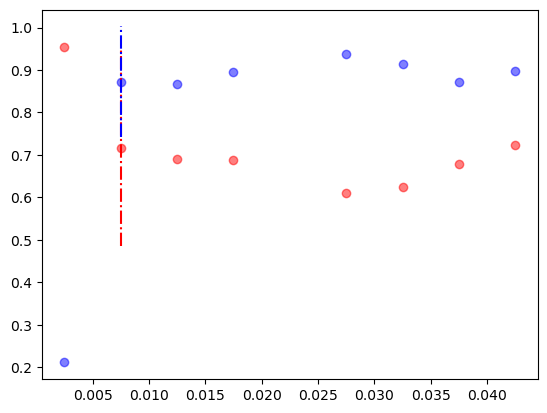

In [14]:
df = pd.read_csv('prec_rec_baseline224_nothresh.csv', delimiter='\t')
plot_prec_rec(df, thresholded = 0)

/tmp/ipykernel_12376/1995846843.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_by_iter = df[mask].groupby(['iter', bins]).mean()[['precision','recall']]
/tmp/ipykernel_12376/1995846843.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  to_plot = df_by_iter.groupby(['threshold']).mean()
/tmp/ipykernel_12376/1995846843.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  to_plot[['prec_std', 'rec_std']] = df_by_ite

Precision is above 0.3 with threshold above 0.75%
Recall is above 0.95 with threshold below 0.25%
Gap to bridge is  0.005
Recall at precision threshold is above 0.51


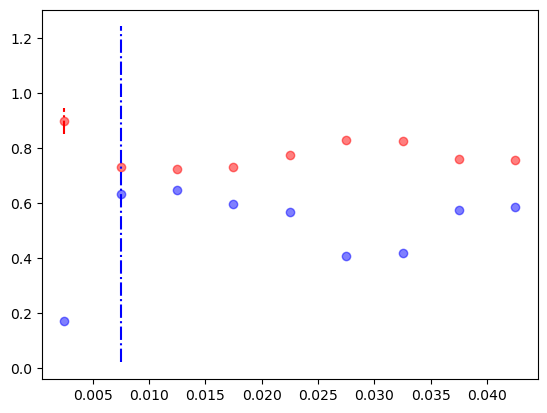

In [15]:
df = pd.read_csv('prec_rec_baseline224_thresh.csv', delimiter='\t')
plot_prec_rec(df, thresholded = 1)